In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

### Desired Distribution
Let $P(x) = 3e^{-\frac{x^2}{2}} + e^{-\frac{(x-4)^2}{2}}$ be the distribution we want to sample from. Note that this is an unnormalized distribution with a normalizing constant $Z$ we can compute but let's keep it as it is.     
($Z \approx 10.0261955464$)  

In [2]:
P = lambda x: 3 * np.exp(-x*x/2) + np.exp(-(x - 4)**2/2)
Z = 10.0261955464

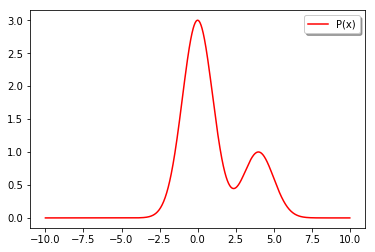

In [3]:
x_vals = np.linspace(-10, 10, 1000)
y_vals = P(x_vals)
plt.figure(1)
plt.plot(x_vals, y_vals, 'r', label='P(x)')
plt.legend(loc='upper right', shadow=True)
plt.show()

Let the functions that we want to approximate be $f(x) = x$ and $g(x) = \sin(x)$. The two values for a unnormalized $P$ are as follows:
* $\mathbb{E}[x] \approx 10.02686647165 $
* $\mathbb{E}[\sin(x)] \approx -1.15088010640 $

In [4]:
f_x = lambda x: x
g_x = lambda x: np.sin(x)
true_expected_fx = 10.02686647165
true_expected_gx = -1.15088010640

### Importance Sampling
$$\mathbb{E}_{x \sim P}[f(x)] = \mathbb{E}_{x \sim Q}\Big[f(x)\frac{P(x)}{Q(x)}\Big]$$
Which means  $\mathbb{E}_{x \sim P}[f(x)] \approx \frac{1}{n}\sum_{i=1}^nf(x_i)\frac{P(x_i)}{Q(x_i)}$ where $x_i$ are drawn from $Q$. This applies when $P$ and $Q$ are both normalized. For unnormalized case    
$$\mathbb{E}_{x \sim P}[f(x)] \approx \frac{\sum_{i=1}^nf(x_i)\frac{P(x_i)}{Q(x_i)}}{\sum_{i=1}^n\frac{P(x_i)}{Q(x_i)}}$$  
Let the proposal distribution $Q(x)$ be a uniform distribution in $[-4,8]$.   
$Q(x) = \frac{1}{8 + 4}$ for $x \in [-4,8]$

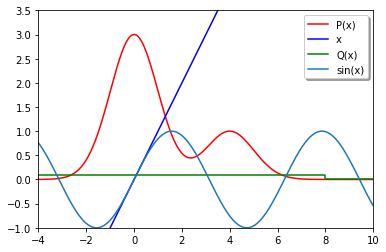

In [5]:
a, b = -4, 8
uniform_prob = 1./(b - a)
plt.figure(2)
plt.plot(x_vals, y_vals, 'r', label='P(x)')
plt.plot(x_vals, f_x(x_vals), 'b', label='x')
plt.plot([-10, a, a, b, b, 10], [0, 0, uniform_prob, uniform_prob, 0, 0], 'g', label='Q(x)')
plt.plot(x_vals, np.sin(x_vals), label='sin(x)')
plt.xlim(-4, 10)
plt.ylim(-1, 3.5)
plt.legend(loc='upper right', shadow=True)
plt.show()

In [6]:
expected_f_x = 0.
expected_g_x = 0.
n_samples = 100000
den = 0.
for i in range(n_samples):
    sample = np.random.uniform(a, b)
    importance = P(sample) / uniform_prob
    den += importance
    expected_f_x += importance * f_x(sample)
    expected_g_x += importance * g_x(sample)
expected_f_x /= den
expected_g_x /= den
expected_f_x *= Z
expected_g_x *= Z
print('E[f(x)] = %.5f, Error = %.5f' % (expected_f_x, abs(expected_f_x - true_expected_fx)))
print('E[g(x)] = %.5f, Error = %.5f' % (expected_g_x, abs(expected_g_x - true_expected_gx)))

E[f(x)] = 9.96023, Error = 0.06664
E[g(x)] = -1.19108, Error = 0.04020
